In [1]:
import numpy as np
import scipy as sp
import cv2
import os
import time
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
def video_to_frames(num):
    print('\n\tVideo {}\n'.format(num))
    start_time = time.time()
    path_video = "./data_video/"
    # i = 1
    name_video = "Endoscope video ({}).mp4".format(num)
    path_video_frames = path_video + str(num) + '/'
    if not os.path.exists(path_video_frames):
        os.mkdir(path_video_frames)
    count = 0
    vidcap = cv2.VideoCapture(path_video+name_video)
    success, image = vidcap.read()
    success = True
    while success:
        print('=', end='', flush=True)
        # print ('Read a new frame: ', success)
        cv2.imwrite(path_video_frames + "frame_{:03d}.png".format(count), image)     # save frame as JPEG file
        count = count + 1
        success,image = vidcap.read()
    print('>\n')
    end_time = time.time()
    print("\n\tTime taken: {:.2f}\n".format(end_time-start_time))

In [10]:
for i in range(26):
    video_to_frames(i+1)


	Video 1

==============================================================================================================================================================================================================================================================================================>


	Time taken: 4.16


	Video 2

========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================>


	Time taken: 9.26

========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

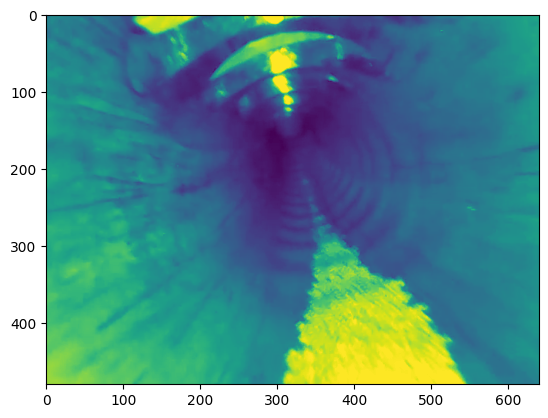

In [9]:
count = 381
start_time = time.time()
path_video = "./data_video/"
num = 8

path_video_frames = path_video + str(num) + '/'
    
im = cv2.imread(path_video_frames + "frame_{:03d}.png".format(count), cv2.IMREAD_GRAYSCALE).astype(float)
plt.imshow(im)
plt.show()

In [10]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift

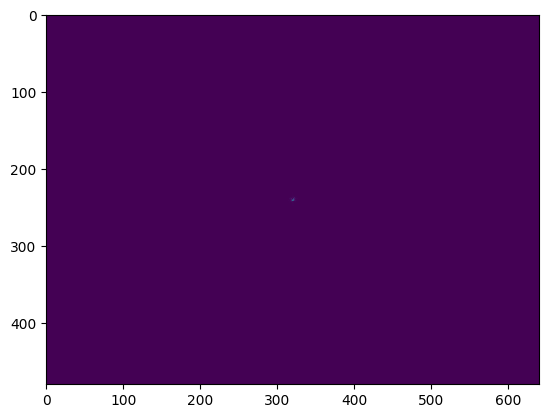

In [41]:
im_fft = fftshift(fft2(ifftshift(np.sqrt(im))))
im_fft[239:241,319:321] = 0
#im_fft = im_fft - np.mean(np.mean(im_fft))
plt.imshow((abs(im_fft)*abs(im_fft)).astype(float))

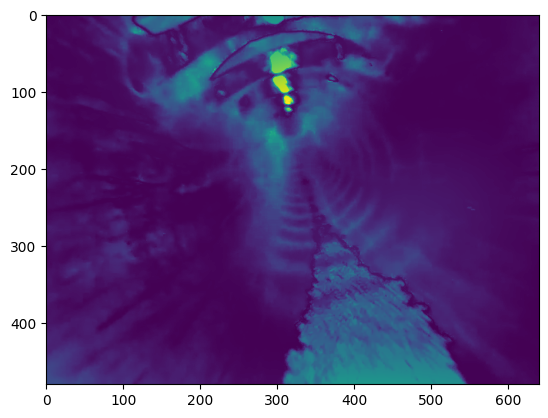

In [42]:
im_2 = ifftshift(ifft2(fftshift(im_fft)))
im_2 = (abs(im_2)*abs(im_2)).astype(float)
plt.imshow(im_2)

In [38]:
im_2.shape

(480, 640)

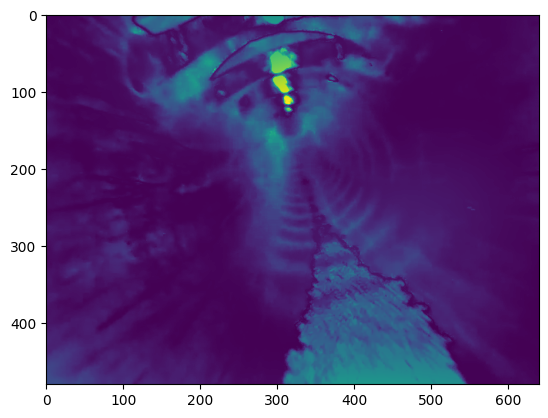

In [43]:
im_2_norm = 255 * im_2 / np.max(np.max(im_2))
plt.imshow(im_2_norm)

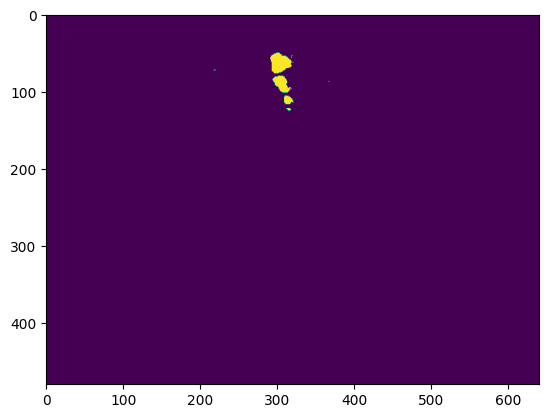

In [54]:
im_2_ex = []
for i in range(im_2_norm.shape[0]):
    arr_ex = []
    for j in range(im_2_norm.shape[1]):
        if im_2_norm[i,j] > 255*0.7:
            arr_ex.append(1)
        else:
            arr_ex.append(0)
    im_2_ex.append(arr_ex)
im_2_ex = np.array(im_2_ex)
plt.imshow(im_2_ex)

In [92]:
x = []
y = []
x_1_list = []
x_2_list = []
for i in range(im_2_ex.shape[0]):
    if sum(im_2_ex[i]) > 10:
        
        x_1 = 0
        x_2 = 0
        k = 0
        for j in range(1, im_2_ex.shape[1]):
            if im_2_ex[i, j] == 1 and im_2_ex[i, j-1] == 0:
                x_1 = j
            elif im_2_ex[i, j] == 0 and im_2_ex[i, j-1] == 1 and j-x_1>10:
                x_2 = j
                break
        if x_1 and x_2:
            y.append(i)
            x.append(int((x_1 + x_2)/2))
            x_1_list.append(x_1)
            x_2_list.append(x_2)

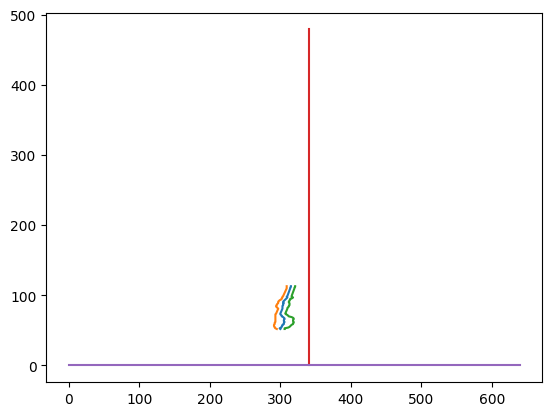

In [95]:
plt.plot(x, y)
plt.plot(x_1_list, y)
plt.plot(x_2_list, y)
plt.plot([340 for i in range(480)], [i for i in range(480)])
plt.plot([i for i in range(640)], [0 for i in range(640)])

In [89]:
angles = []
for i in range(5, len(x)):
    a = (x[i-5]-x[i])/abs(y[i]-y[i-5])
    angles.append(a)
print(np.mean(angles))
angle = np.arctan(np.mean(angles))
print(angle)

-0.21404286770140427
-0.21086113664727607


In [96]:
angles_1 = []
for i in range(5, len(x_1_list)):
    a = (x_1_list[i-5]-x_1_list[i])/abs(y[i]-y[i-5])
    angles_1.append(a)
print(np.mean(angles_1))
angle_1 = np.arctan(np.mean(angles_1))
print(angle_1)

-0.26444937176644495
-0.25853116274042137


In [97]:
x_0 = int((angle*x[-1] - angle_1*x_1_list[-1])/(angle-angle_1))
y_0 = int(angle*x_0 + y[-1] - angle*x[-1])
print(x_0, y_0)

282 119
